# Plotting for Exploratory data analysis (EDA)

# Basic Terminology


In [37]:
# • what is EDA ?
# • Data-point / vector / observation
# • Data set.
# • Feature / variable / Input - variable / Independent - variable
# • Label / Dependent - variable / Output - variable / class / class-label / response label
# • Vector: 2-D, 3-D, 4-D,..... n-D


# what is a 1-D vector : Scalar 

# • Iris flower dataset


In [38]:
#• Iris flower dataset

# for reference dataset link (Wikipedia)
# https://en.wikipedia.org/wiki/Iris_flower_data_set#Python_code_illustrating_usage 
# A simple dataset  to learn the basics.
# 3 flower of Iris species. [ see images on wikipedia link above]
# 1936 by Ronald Fisher 
# petal and sepal

# Objective: classify a new flower as belonging to one of the 3 species based on given the 4 features.

# Importance of domain knowledge.
# why use petal and sepal dimensions as features ?
# why do we not use 'color' as a feature ?

In [53]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load iris_dataset.csv into a pandas dataframe.
iris = pd.read_csv("D:\LEARNING\iris_dataset.csv")
print(iris)

     Data set order  Sepal length  Sepal width  Petal length  Petal width  \
0                 0           5.1          3.5           1.4          0.2   
1                 1           4.9          3.0           1.4          0.2   
2                 2           4.7          3.2           1.3          0.2   
3                 3           4.6          3.1           1.5          0.2   
4                 4           5.0          3.6           1.4          0.3   
..              ...           ...          ...           ...          ...   
145             145           6.7          3.0           5.2          2.3   
146             146           6.3          2.5           5.0          1.9   
147             147           6.5          3.0           5.2          2.0   
148             148           6.2          3.4           5.4          2.3   
149             149           5.9          3.0           5.1          1.8   

          Species  
0       I. setosa  
1       I. setosa  
2       I. seto

In [57]:
# Q: How many date-points and features ?
print(iris.shape) # return in (rows, cols)

(150, 6)


In [58]:
# Q: what are the columns names in our dataset ?
print(iris.columns)
print(type(iris))

print(iris.head()) # first 5 rows
print(iris.tail()) # last 5 rows
print(iris.Species)

Index(['Data set order', 'Sepal length', 'Sepal width', 'Petal length',
       'Petal width', 'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
   Data set order  Sepal length  Sepal width  Petal length  Petal width  \
0               0           5.1          3.5           1.4          0.2   
1               1           4.9          3.0           1.4          0.2   
2               2           4.7          3.2           1.3          0.2   
3               3           4.6          3.1           1.5          0.2   
4               4           5.0          3.6           1.4          0.3   

     Species  
0  I. setosa  
1  I. setosa  
2  I. setosa  
3  I. setosa  
4  I. setosa  
     Data set order  Sepal length  Sepal width  Petal length  Petal width  \
145             145           6.7          3.0           5.2          2.3   
146             146           6.3          2.5           5.0          1.9   
147             147           6.5          3.0           5.2  

In [59]:
# How many data-points for each class are present ?
# (Or) How many flowers of each species are present in the dataset ?

iris["Species"].value_counts()
# balanced vs imbalanced dataset.
# Iris is a balanced dataset as the number of data points for every class is same.

Species
I. setosa        50
I. versicolor    50
I. virginica     50
Name: count, dtype: int64

# • 2-D Scatter Plot


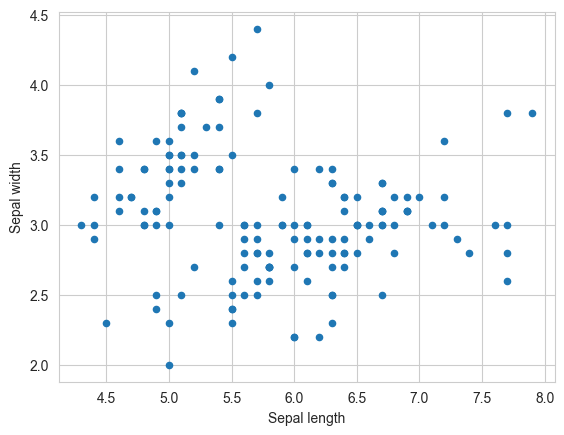

In [60]:
# 2-D Scatter Plot
# Always understand the axis: label and scale.

iris.plot(kind='scatter', x= 'Sepal length', y='Sepal width')
# plt.grid() # add grid lines to the plot
plt.show() # display the plot

# cannot make much sense out it.
# what if we color the points by their class-label / flower-type

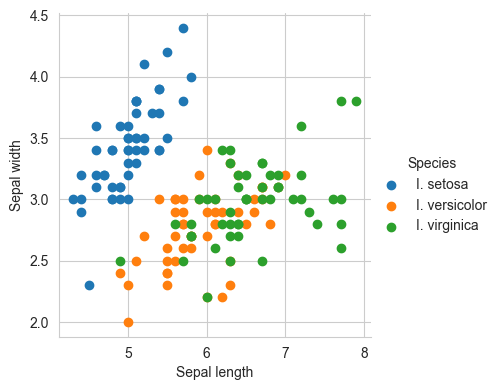

In [61]:
# • 2-D Scatter plot with color-coding for each flower type /class.
# here 'sns' corresponds to seaborn library

sns.set_style("whitegrid") # set plot style 
# set plot style 
# possible styles: darkgrid, whitegrid, dark, white, ticks
# sns.FacetGrid : create a grid for plotting conditional relationships
sns.FacetGrid(iris, hue="Species", height=4) \
    .map(plt.scatter, "Sepal length", "Sepal width") \
    .add_legend()

plt.show()

# Notice that the blue points can be easily separated 
# from red and green by drawing a line.
# but red and green data points cannot be easily separated.
# can we draw multiple 2-D scatter plots for each combination of features ?
# How many combinations exist? 4C2 = 6 combinations exist.


# Observation(s):

# • Using sepal length and sepal width features, we can distinguish Setosa flower form others.

# • Separated Versicolor form virginica is much harder as they have considerable overlap.


# •  3D - Scatter Plot: -

In [62]:
# Need a lot to mouse interactions to interpret data.
# for:
# what about 4-D, 5-D or n-D scatter plots ?

In [63]:
# 3-D Scatter Plot: -

import plotly.graph_objs as go
import pandas as pd 
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True) # initialize plotly in notebook mode

# load iris dataset
df = pd.read_csv("D:\LEARNING\iris_dataset.csv")
df.head() # display first 5 rows

# create a empty list to store data/trace
data = []
# create a empty list to store clusters
clusters = []

# define colors for each species
colors = ['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)']

# iterate through each species and create a scatter3d trace
for i, species in enumerate(df['Species'].unique()):
    color = colors[i % len(colors)]
    x = df[df['Species'] == species]['Sepal length']
    y = df[df['Species'] == species]['Sepal width']
    z = df[df['Species'] == species]['Petal length']

    # make one trace (a group of dots) per species
    trace = dict(
        name=species,
        x=x, y=y, z=z,
        type='scatter3d',
        mode='markers',
        marker=dict(size=5, color=color, line=dict(width=0))
    )
    data.append(trace)

# define the layout for the 3D scatter plot
layout = dict(

    width=800,
    height=550,
    autosize=False,
    title='iris dataset',
    # define the 3D scene
    scene = dict(
        # define x, y, z axis properties
        xaxis = dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
        ),
        yaxis = dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
        ),
        zaxis = dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
        ),
        # define aspect ratio, aspect mode
        aspectratio = dict(x=1, y=1, z=0.7),
        aspectmode = 'manual'
    ),
)

# create the figure and plot it in the notebook
fig = dict(data=data, layout=layout)
pyo.iplot(fig, filename='pandas-3d-iris', validate=False)

# •  Pair Plot:  for multi-dimensional data visualization like : (4-D, 5-D or N- D etc..)

c:\Users\ompra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\ompra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\ompra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\ompra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When gr

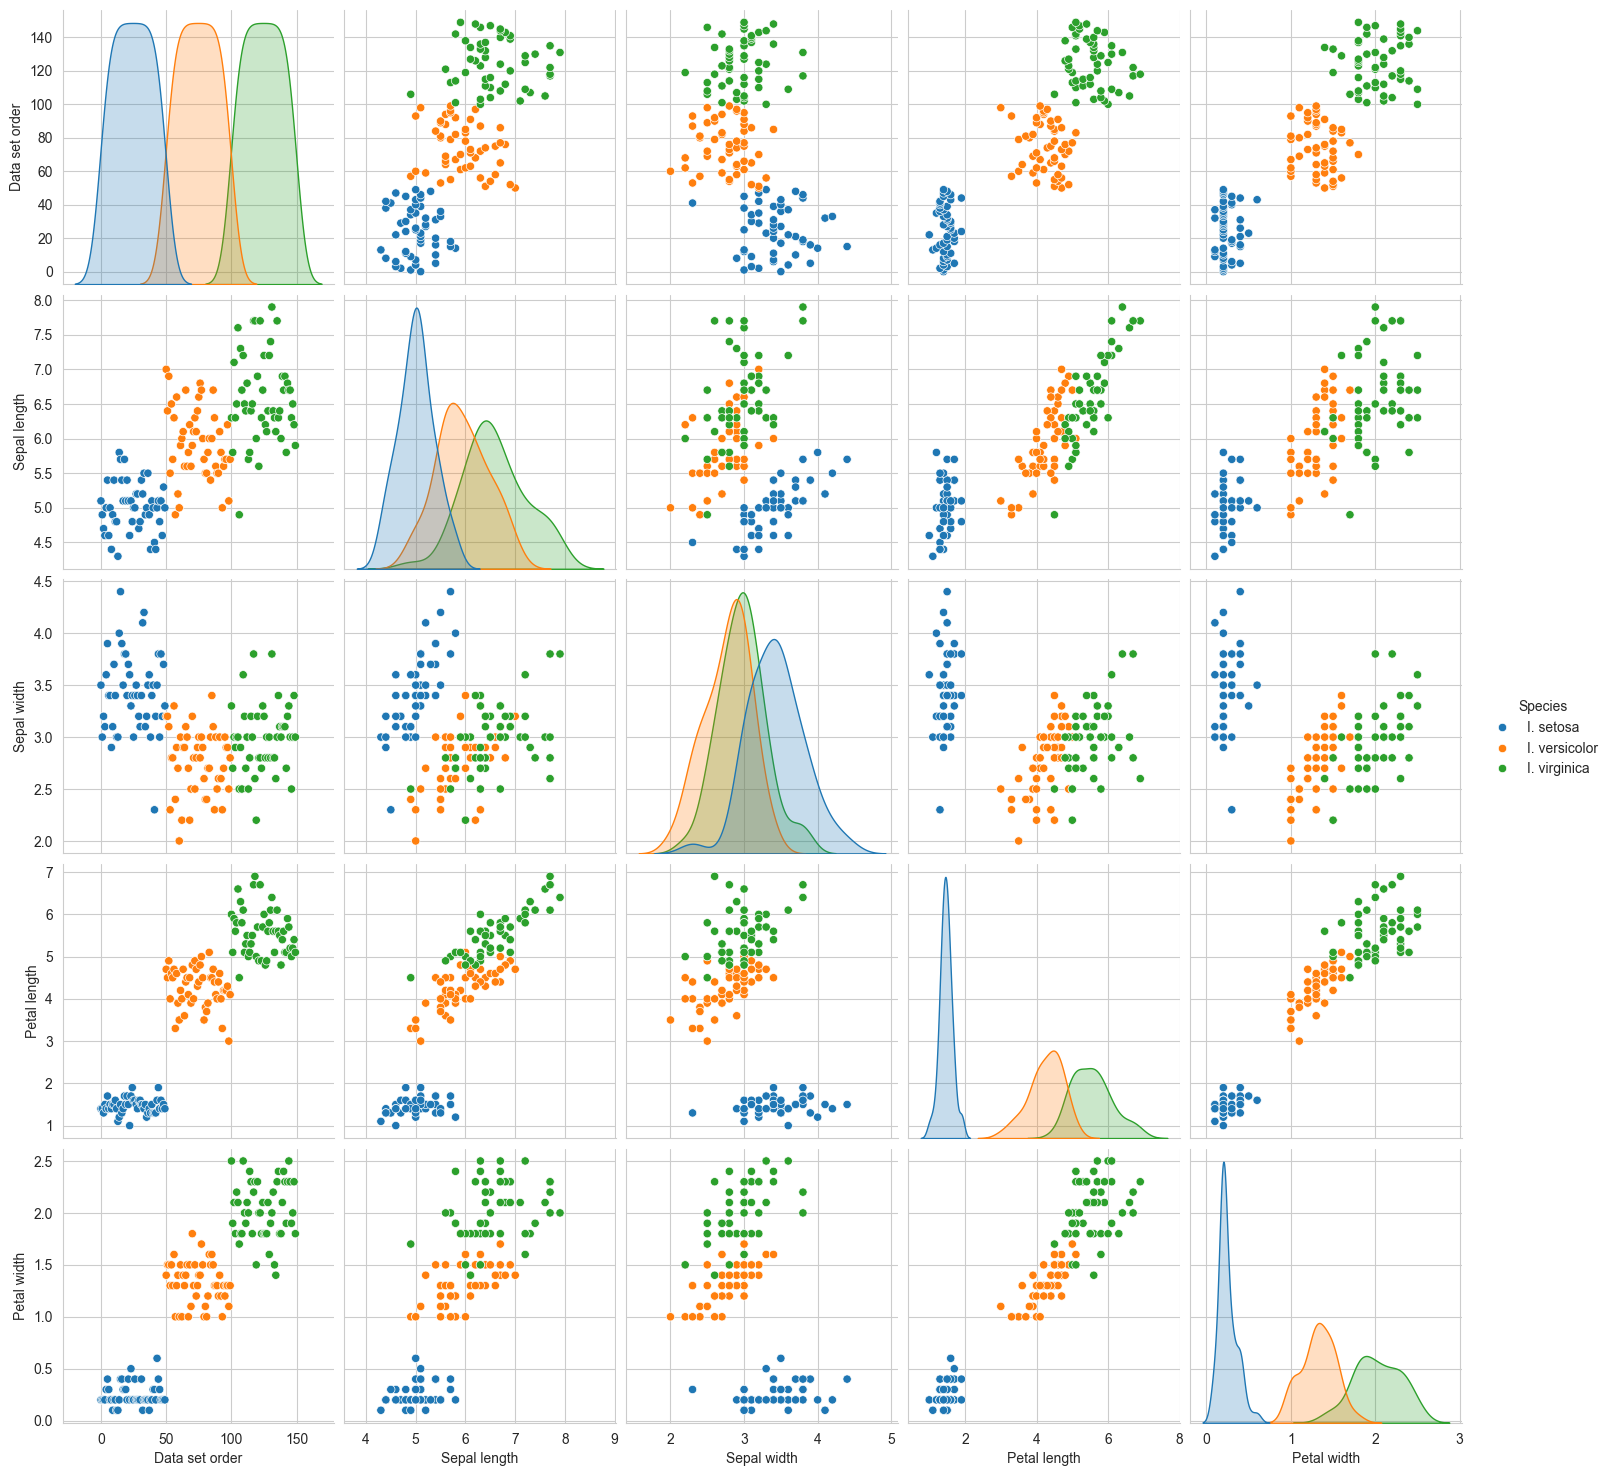

In [66]:
# Pairwise scatter plots: Pair-plot
# Dis-advantages:
## Can be used when number of features are high.
## Cannot visualize higher dimensional patterns in 3-D and 4-D.
# Only possible to view 2D patterns.

plt.close() # close existing plots
sns.set_style('whitegrid')
sns.pairplot(iris, hue='Species', height=3)
plt.show()

# Note: the diagonal elements are PDFs for each feature. PDFs are explained

In [48]:
# • Observations:-
#   1. petal_length and petal_width are the most useful features to identify various flower types.
#   2. While Setosa can be easily identified (linearly separable), virginica and versicolor have some overlap(almost linearly separable.)
#   3. We can find "lines" and "if-else" condition build a simple model to classify the flower types.

#  5.Video started: Histogram and Introduction to PDF(Probability Density Function) : 

# • Histogram, PDF(Probability Density function), CDF(Cumulative Distribution function)

Series([], Name: Petal length, dtype: float64)


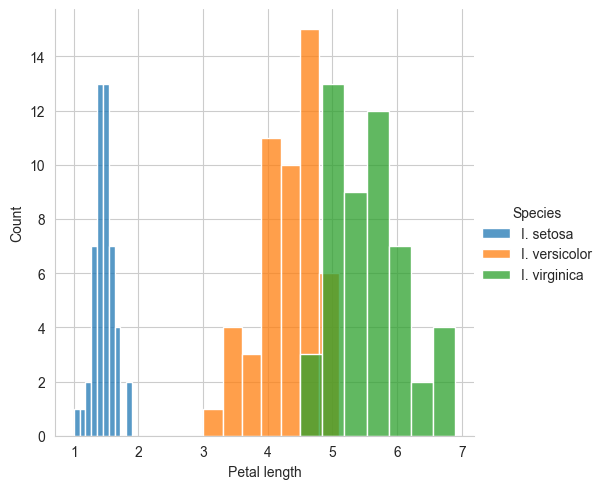

In [68]:
# What about 1-D scatter plot using just one feature ?
# 1-D Scatter plot of petal length 

import numpy as np

# separate the dataset by species
iris_setosa = iris.loc[iris['Species'] == 'setosa']
iris_virginica = iris.loc[iris['Species'] == 'virginica']
iris_versicolor = iris.loc[iris['Species'] == 'versicolor']

print (iris_setosa['Petal length']) 

# 1-D histogram scatter plot
sns.FacetGrid(iris, hue="Species", height=5) \
    .map(sns.histplot, "Petal length") \
    .add_legend()  

plt.show()

# Disadvantages of 1-D scatter plot: Very hard to make sense as points 
# are overlapping a lot.
# are there better ways of visualizing 1-D scatter plot data ?


In [50]:
# Histogram and Probability Density function (PDF) using KDE
# How to compute PDFs using counts/frequencies of data-points in each window.
# How window width effects the PDF plot

# Interpreting a PDF plot :
# • Why is it called a density plot ?
# • why is it called probability plot?
# • For each value of petal length, what does the value on y-axis mean ?
# • Notice that we can write a simple if..else condition as if(Petal Length) < 2 < 2.5:
# Using just one feature , we can build a simple model to classify if..else.. states

# Disadvantages of PDF:
# • Can we say what percentage of versicolor point have a petal length between 4 and 5 ?



# • Do some of these plots look like a bell-curve studied in under-grad? 
# • Gaussian function / Normal Distribution function
# • What is 'Normal' about Normal Distribution ?
# e.g: height of male student in a class.


# • One of the most frequently distribution in nature .

[0.24666667 0.08666667 0.         0.02       0.05333333 0.17333333
 0.19333333 0.12       0.07333333 0.03333333]
[1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]


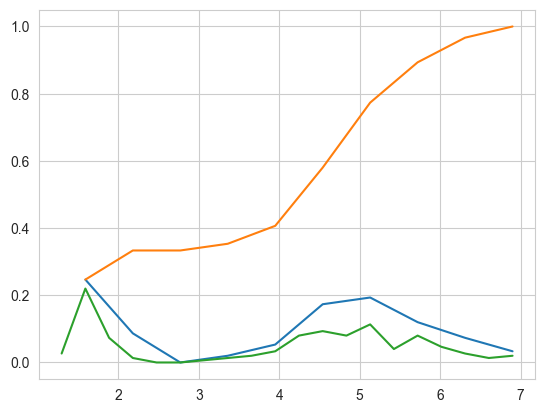

In [69]:
# Need for Cumulative Distribution Function (CDF)
# • we can visually see what percentage of versicolor flowers have petal length less than 5 .
# How to Construct CDF
# How to read a CDF plot ?

# Plot CDF of petal Length 

counts, bin_edges = np.histogram(iris['Petal length'], bins=10, density=True)

pdf = counts / sum(counts)
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(iris['Petal length'], bins=20, density=True)

pdf = counts / sum(counts)
plt.plot(bin_edges[1:], pdf)

plt.show()

# Univariate Analysis: Using PDF(Probability Density Function).

# • Some code repeating above cells


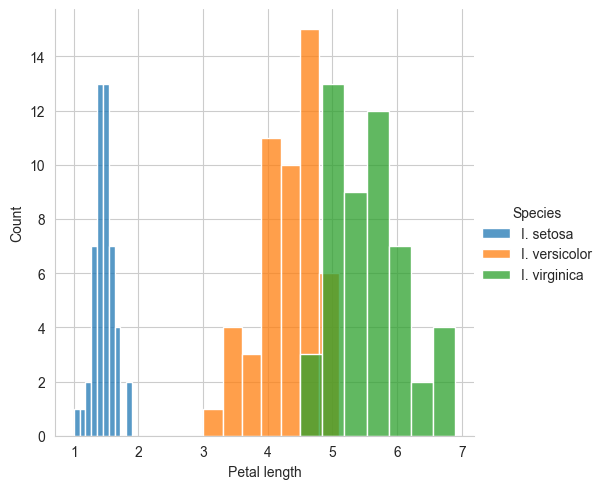

In [70]:
sns.FacetGrid(iris, hue="Species", height=5) \
    .map(sns.histplot, "Petal length" ) \
    .add_legend()

plt.show()
